## Kernel Principal Component Analysis

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
#Gathering Data
credit = pd.read_csv(r"/home/seckindinc/Desktop/Github/Python/Data-Sets/Risk.txt",sep=",",index_col=False)

In [3]:
#First 5 Rows of Data
credit.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,MORTGAGE,STORECAR,LOANS,RISK
0,100756,44,59944,m,married,1,2,monthly,y,2,0,good risk
1,100668,35,59692,m,married,1,1,monthly,y,1,0,bad loss
2,100418,34,59508,m,married,1,1,monthly,y,2,1,good risk
3,100416,34,59463,m,married,0,2,monthly,y,1,1,bad loss
4,100590,39,59393,f,married,0,2,monthly,y,1,0,good risk


In [4]:
#Selecting Numeric Fields To Be Used In Modelling
X = credit[['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']]

In [5]:
#Importing z score scaler library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [6]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [7]:
#Assining Column Names
X_scaled.columns = ['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']
X_normalized.columns = ['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']

In [8]:
#Implementing Algorithm with z score 
from sklearn.decomposition import KernelPCA
pca_scaled = KernelPCA(n_components=2,kernel='rbf')
pca_scaled.fit(X_scaled)
X_scaled_pca = pca_scaled.transform(X_scaled)

In [9]:
#Print shape difference before PCA and after PCA
print('Original data shape: \n',X_scaled.shape)
print('Transformed data shape: \n',X_scaled_pca.shape)

Original data shape: 
 (4117, 5)
Transformed data shape: 
 (4117, 2)


Text(0,0.5,'Second Principal Component')

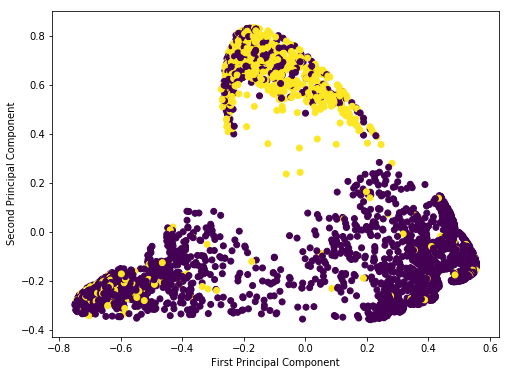

In [10]:
#Scatter plot of principal components based on Risk column
plt.figure(figsize=(8,6))
plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c=np.where(credit['RISK'].str.contains('good'), 1,0))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')